In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [38]:
# Importing data
df = pd.read_csv("data/healthcare_charges.csv")

### **0. Summary:**

This report features analysis of healhcare charges and attempts to find any trend in the healthcare expenditure across different variables like age, gender, regions, smoking habit, no. of children and BMI. After conducting thorough analysis regression models have been applied to predict charges based on the available features.

**A Note on Data**
- The data contains 1338 rows and 7 variables, each row concerns with a patient. The raw data looks pretty clean - there are no duplicate entries or 'missing' values.
- The data is very well distributed across age groups, gender, region. 

### **1. Exploratory Data Analysis (EDA)**

##### 1.1 Data Exploration:

In [39]:
# Looking at the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
#shape of the data
print(f'No of columns: {df.shape[1]}\nNo of rows: {df.shape[0]}')

No of columns: 7
No of rows: 1338


In [41]:
#Info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
# statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
# checking for missing values
print('There are no missing values.')
df.isnull().sum()

There are no missing values.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
# Binning the ages, adding a new column to dataframe
df['ages_binned'] = pd.cut(df['age'], bins = [10,20,30,40,50,60,70])

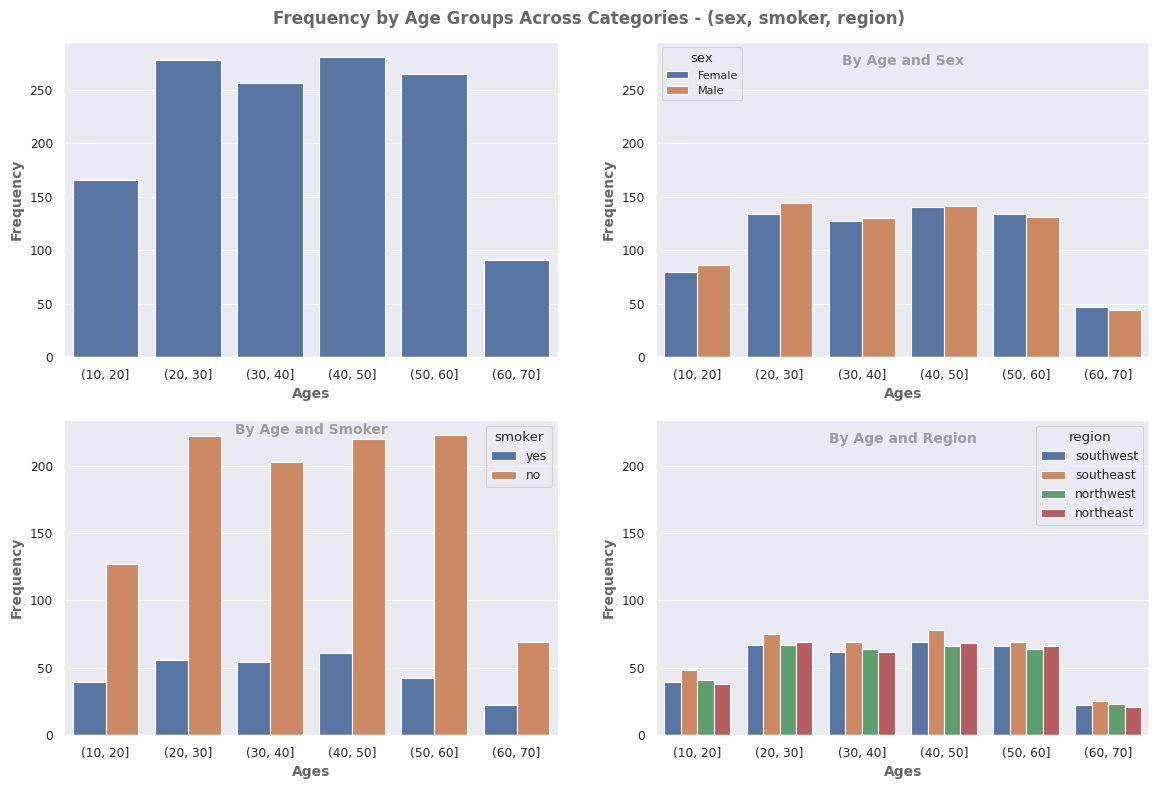

In [45]:
# Distribution by age group
sns.set_theme(context= 'paper', style= 'darkgrid')
fig = plt.figure(figsize=(14, 9))
fig.text(0.5, 0.90, 'Frequency by Age Groups Across Categories - (sex, smoker, region)', fontsize=12, ha='center', alpha= .7, fontweight= 'bold')
ax = plt.subplot(2,2,1)
ax = sns.countplot(data=df, x='ages_binned')
ax.set_xlabel("Ages", fontsize = 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=10, fontweight= 'bold', alpha= .7)
#plt.xticks(rotation=45)

ax = plt.subplot(2,2,2, sharey= ax)
sns.countplot(df, x= 'ages_binned', hue= 'sex')
ax.set_xlabel("Ages", fontsize = 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=10, fontweight= 'bold', alpha= .7)
#plt.xticks(rotation=45)
ax.legend(['Female', 'Male'], loc= 'upper left', title= 'sex', fontsize= 8)
ax.set_title('By Age and Sex',fontsize = 10, fontweight= 'bold', alpha= .4 , y= .9)

ax = plt.subplot(2,2,3)
sns.countplot(df, x= 'ages_binned', hue= 'smoker')
ax.set_xlabel("Ages", fontsize = 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=10, fontweight= 'bold', alpha= .7)
ax.set_title('By Age and Smoker',fontsize = 10, fontweight= 'bold', alpha= .4 , y= .93)
#plt.xticks(rotation=45)

ax = plt.subplot(2,2,4, sharey= ax)
sns.countplot(df, x= 'ages_binned', hue= 'region')
ax.set_xlabel("Ages", fontsize = 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=10, fontweight= 'bold', alpha= .7)
ax.set_title('By Age and Region',fontsize = 10, fontweight= 'bold', alpha= .4 , y= .9)
#plt.xticks(rotation=45)

#ax.legend(['Female', 'Male'], loc= 'upper left', title= 'sex', fontsize= 8)

plt.show()

##### *No. of children can be an important feature in determining charges, lets look into 'children' feature in detail.*

In [46]:
# converting 'children' into categorical variable
df['children'] = df['children'].astype('category')

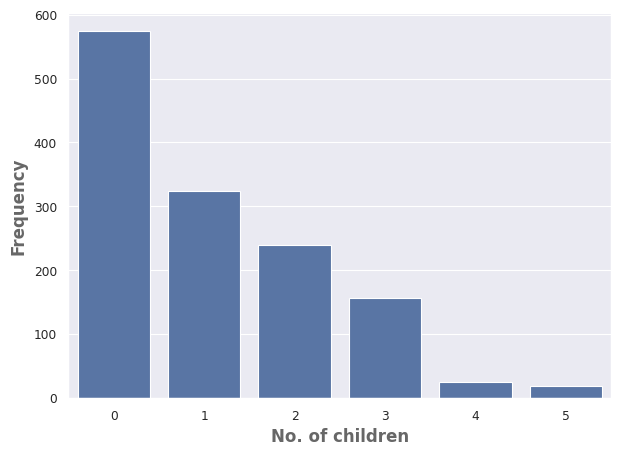

In [47]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
sns.countplot(df, x= 'children')
ax.set_xlabel("No. of children", fontsize = 12, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=12, fontweight= 'bold', alpha= .7)
plt.show()

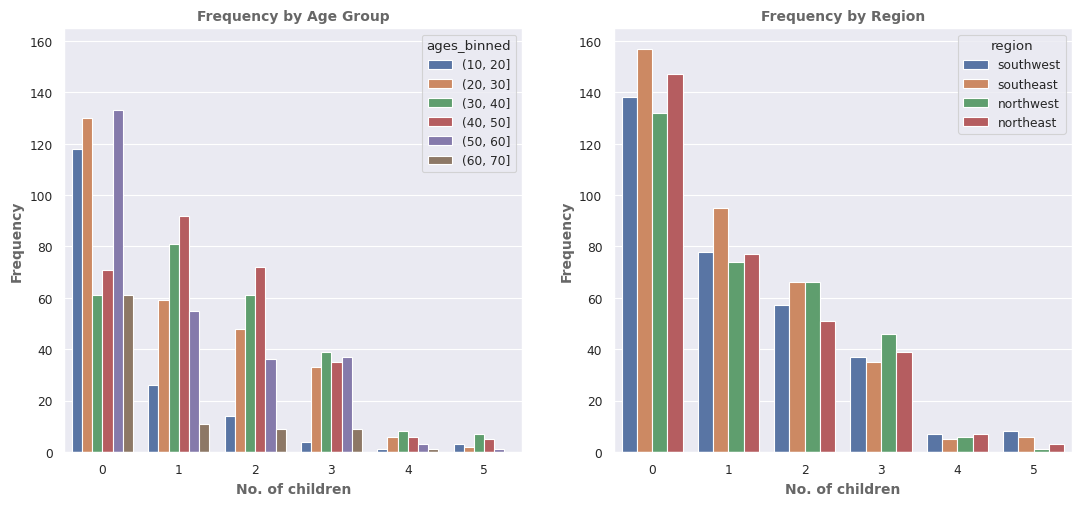

In [48]:
fig = plt.figure(figsize=(13,5.5))
ax = plt.subplot(1,2,1)
sns.countplot(df, x= 'children', hue= 'ages_binned')
ax.set_xlabel("No. of children", fontsize = 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=10, fontweight= 'bold', alpha= .7)
ax.set_title("Frequency by Age Group", fontsize = 10, fontweight= 'bold', alpha= .7)

ax = plt.subplot(1,2,2, sharey= ax)
sns.countplot(df, x= 'children', hue= 'region')
ax.set_xlabel("No. of children", fontsize = 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel("Frequency", fontsize=10, fontweight= 'bold', alpha= .7)
ax.set_title("Frequency by Region", fontsize = 10, fontweight= 'bold', alpha= .7)

plt.show()

##### Observation:

- Having 4 or 5 children is less frequent, this trend is seen across age-groups and across regions.

##### 1.2 Univariate Analysis

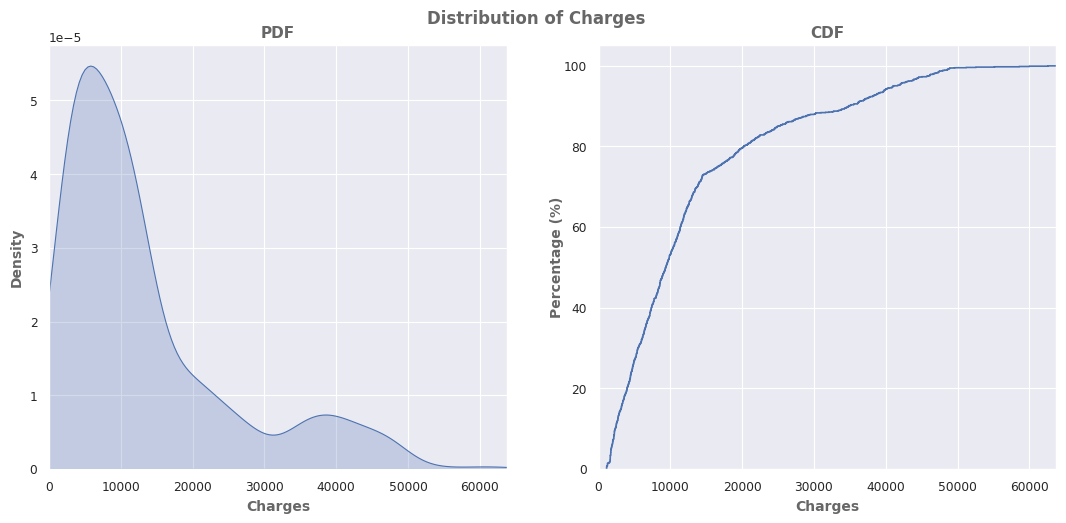

In [49]:
# Looking into the distribution of charges
fig = plt.figure(figsize=(13,5.5))
fig.text(0.5, .92, 'Distribution of Charges', fontsize=12, ha='center', alpha= .7, fontweight= 'bold')
ax = plt.subplot(1,2,1)
sns.kdeplot(data= df, x= 'charges', color='b', fill= True)
ax.set_xlim(0, np.max(df['charges']))
plt.title("PDF", fontsize = 11, alpha= .7,fontweight= 'bold')
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel('Density', fontsize= 10, fontweight= 'bold', alpha= .7)

ax = plt.subplot(1,2,2)
sns.ecdfplot(data= df, x= 'charges', color='b', stat='percent')
ax.set_xlim(0, np.max(df['charges']))
plt.title("CDF", fontsize = 11, alpha= .7,fontweight= 'bold')
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel('Percentage (%)', fontsize= 10, fontweight= 'bold', alpha= .7, labelpad=0)

plt.show()

##### Observation:
- Distribution of charges is right-skewed. 
- Approx. 80% population has charges below 20k.

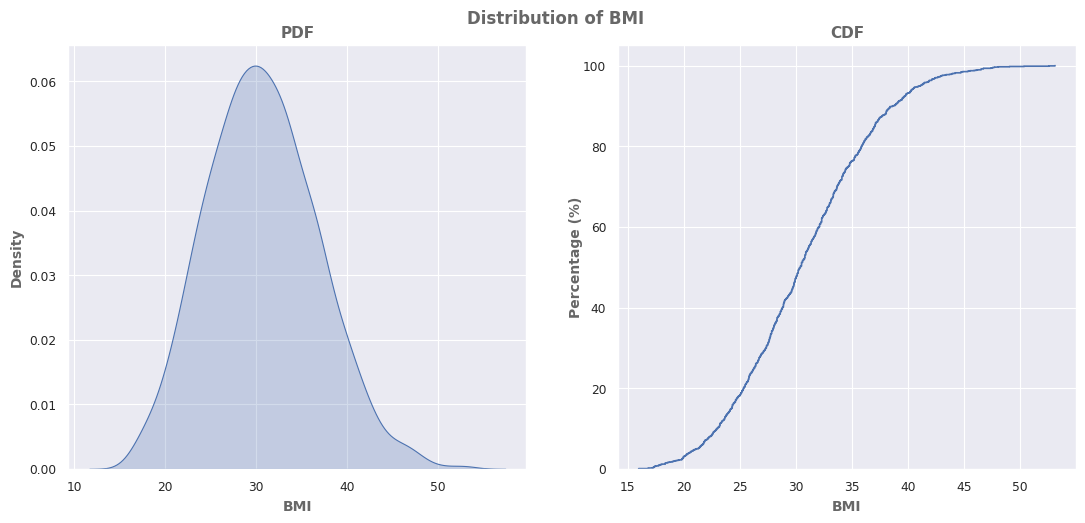

In [50]:
# Looking into the distribution of bmi
fig = plt.figure(figsize=(13,5.5))
fig.text(0.5, .92, 'Distribution of BMI', fontsize=12, ha='center', alpha= .7, fontweight= 'bold')
ax = plt.subplot(1,2,1)
sns.kdeplot(data= df, x= 'bmi', color='b', fill= True)
plt.title("PDF", fontsize = 11, alpha= .7,fontweight= 'bold')
ax.set_xlabel('BMI', fontsize= 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel('Density', fontsize= 10, fontweight= 'bold', alpha= .7)

ax = plt.subplot(1,2,2)
sns.ecdfplot(data= df, x= 'bmi', color='b', stat='percent')
plt.title("CDF", fontsize = 11, alpha= .7,fontweight= 'bold')
ax.set_xlabel('BMI', fontsize= 10, fontweight= 'bold', alpha= .7)
ax.set_ylabel('Percentage (%)', fontsize= 10, fontweight= 'bold', alpha= .7, labelpad=0)

plt.show()

#### 1.3 Bivariate Analysis

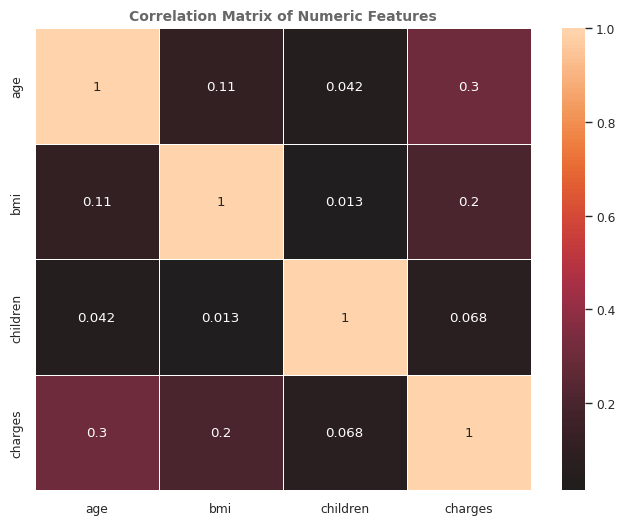

In [51]:
df_ = df.drop(columns = ['sex', 'smoker', 'region','ages_binned'], inplace=False)
corr_matrix = df_.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize = 10, fontweight= 'bold', alpha= .7)
plt.show()

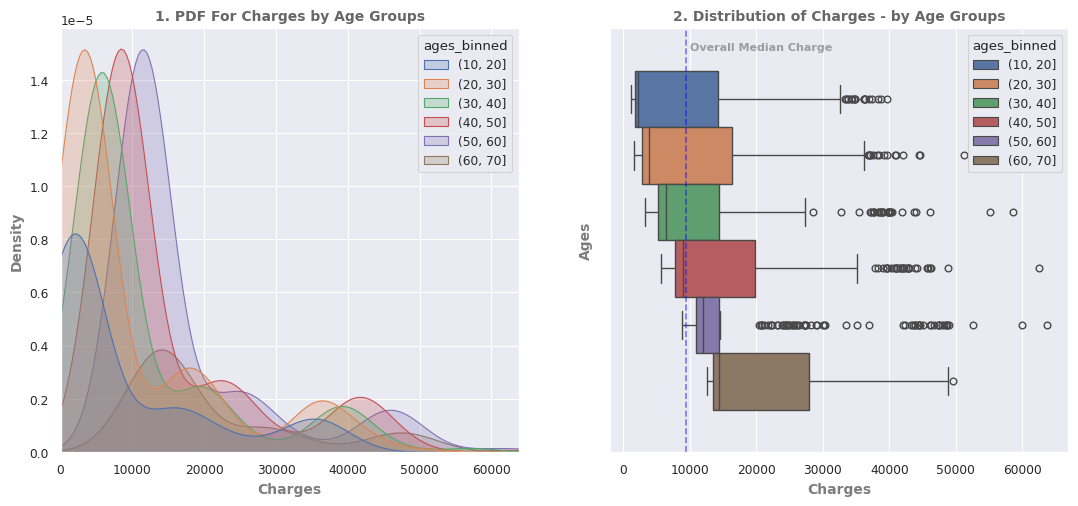

In [52]:
# Looking into the distribution of charges by Age Group
fig = plt.figure(figsize=(13,5.5))
ax = plt.subplot(1,2,1)
sns.kdeplot(data= df, x= 'charges', fill= True, hue= 'ages_binned')
ax.set_xlim(0, np.max(df['charges']))
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Density', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_title("1. PDF For Charges by Age Groups", fontsize = 10, fontweight= 'bold', alpha= .7)

ax = plt.subplot(1,2,2)
sns.boxplot(data= df, x= 'charges', hue= 'ages_binned')
ax.axvline(x = np.median(df['charges']), linestyle= '--', alpha= .5, color='blue')
ax.text(10000, -0.45, 'Overall Median Charge', fontweight= 'bold', alpha=.4, size= 8)
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel("Ages", fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_title("2. Distribution of Charges - by Age Groups", fontsize = 10, fontweight= 'bold', alpha= .7)

plt.show()

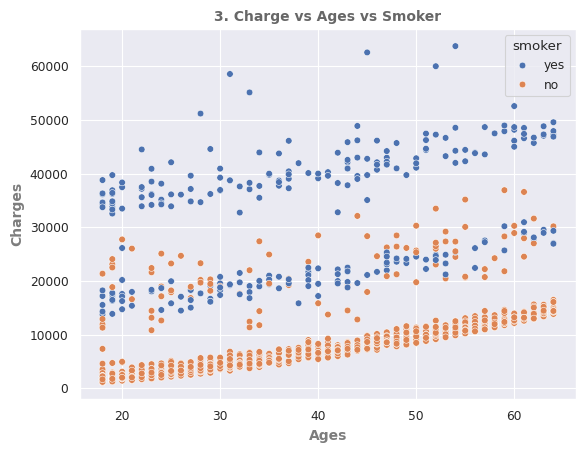

In [53]:
#Scatterplot for Charges vs Ages vs Smoker
ax = sns.scatterplot(data= df, x= 'age', y= 'charges', hue= 'smoker')
ax.set_xlabel('Ages', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_title("3. Charge vs Ages vs Smoker", fontsize = 10, fontweight= 'bold', alpha= .7)
plt.show()

##### Observation:
1. Healthcare cost goes up as people get older.
2. Those above 50 years old pay more than the overall median and those below 50 pay less than overall median.
3. From the scatterplot, across all age groups smokers pay significantly higher charges than non-smokers. There charges as extreme as 65k among smokers. 

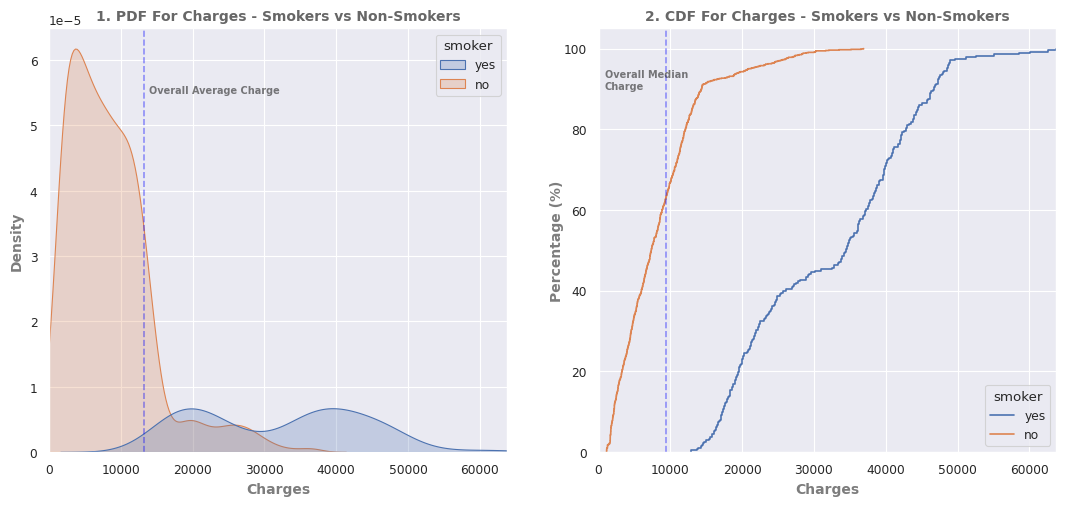

In [54]:
# Distribution of Charges - Smokers vs Non-Smokers
fig = plt.figure(figsize=(13,5.5))
ax = plt.subplot(1,2,1)
sns.kdeplot(data= df, x= 'charges', color='b', fill= True, hue= 'smoker')
ax.set_xlim(0, np.max(df['charges']))
ax.axvline(x = np.mean(df['charges']), linestyle= '--', alpha= .4, color='blue')
ax.text(14000, .000055, 'Overall Average Charge', fontweight= 'bold', alpha=.6, size= 7)
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Density', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_title("1. PDF For Charges - Smokers vs Non-Smokers", fontsize = 10, fontweight= 'bold', alpha= .7)

ax = plt.subplot(1,2,2)
sns.ecdfplot(data= df, x= 'charges', hue= 'smoker', stat= 'percent')
ax.axvline(x = np.median(df['charges']), linestyle= '--', alpha= .4, color='blue')
ax.set_xlim(0, np.max(df['charges']))
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.text(900, 90, 'Overall Median \nCharge', fontweight= 'bold', alpha=.6, size= 7)
ax.set_ylabel('Percentage (%)', fontsize= 10, fontweight= 'bold', alpha= .6, labelpad= 0)
ax.set_title("2. CDF For Charges - Smokers vs Non-Smokers", fontsize = 10, fontweight= 'bold', alpha= .7)

plt.show()

##### Observation:
1. Above two graphs clearly indicate those with smoking habits are paying significantly higher healthcare cost than non-smokers.
2. Non-smokers pay significantly less than the overall average.
3. Approx. 80% those who smoke pay less than 40k charges, this very high given that overall median expenditure is ~10k. 

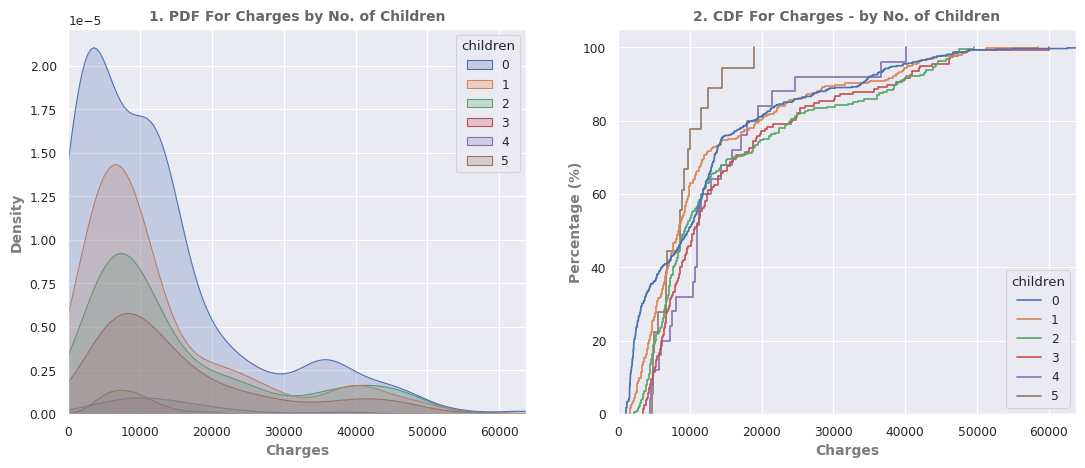

In [55]:
# Distribution of Charges by No. of children
fig = plt.figure(figsize=(13,5))
ax = plt.subplot(1,2,1)
ax = sns.kdeplot(data= df, x= 'charges', color='b', fill= True, hue= 'children')
ax.set_xlim(0, np.max(df['charges']))
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Density', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_title("1. PDF For Charges by No. of Children", fontsize = 10, fontweight= 'bold', alpha= .7)

ax = plt.subplot(1,2,2)
sns.ecdfplot(data= df, x= 'charges', hue= 'children', stat= 'percent')
ax.set_xlim(0, np.max(df['charges']))
ax.set_xlabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Percentage (%)', fontsize= 10, fontweight= 'bold', alpha= .6, labelpad= 0)
ax.set_title("2. CDF For Charges - by No. of Children", fontsize = 10, fontweight= 'bold', alpha= .7)

plt.show()


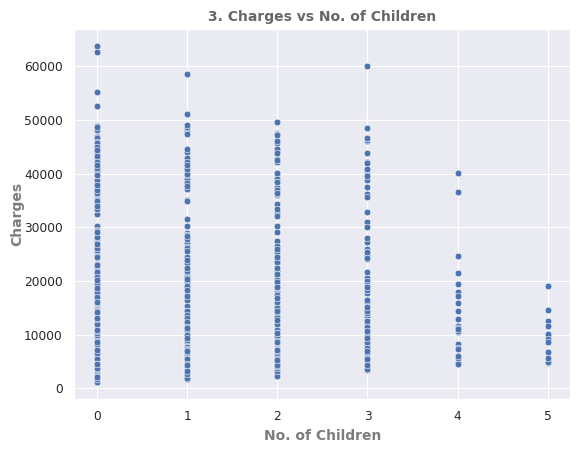

In [56]:
#Scatterplot for Charges vs No. of Children
ax = sns.scatterplot(data= df, x= df['children'].astype('int'), y= 'charges')
ax.set_xlabel('No. of Children', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6, labelpad= 0)
ax.set_title("3. Charges vs No. of Children", fontsize = 10, fontweight= 'bold', alpha= .7)
plt.show()

##### Observation:
1. From the PDF curve, the largest proportion of sample has zero children.
2. From the CDF curve, there is no significant variation in charges as the number of children varies. Approximately 80% in each category (0,1,2,3,4 children) has charges under 25k.
3. The scatterplot is inline with the CDF, further confirms that there's no significant change in charges with variation in children count. 

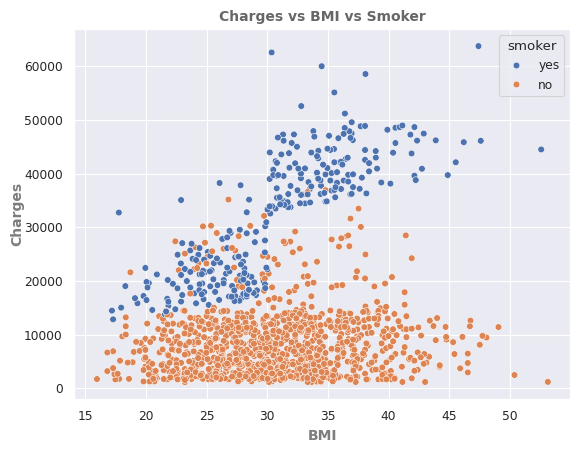

In [57]:
#Scatterplot for Charges vs BMI vs Smoker
ax = sns.scatterplot(data= df, x= 'bmi', y= 'charges', hue='smoker')
ax.set_xlabel('BMI', fontsize= 10, fontweight= 'bold', alpha= .6)
ax.set_ylabel('Charges', fontsize= 10, fontweight= 'bold', alpha= .6, labelpad= 0)
ax.set_title("Charges vs BMI vs Smoker", fontsize = 10, fontweight= 'bold', alpha= .7)
plt.show()

##### Observation:
1. The charges increases as the BMI increases. There's a scope of further investigation on those with obesity.
2. The charges incurred is significantly higher for smokers compared to non-smokers. This trend is more apparent as BMI increases.

### **2.0 Data Processing and Model Implementation**

#### 2.1 Data Preprocessing

In [58]:
#Dropping the age column, ages_binned will be used as age indicator
df.drop(columns='age', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          1338 non-null   object  
 1   bmi          1338 non-null   float64 
 2   children     1338 non-null   category
 3   smoker       1338 non-null   object  
 4   region       1338 non-null   object  
 5   charges      1338 non-null   float64 
 6   ages_binned  1338 non-null   category
dtypes: category(2), float64(2), object(3)
memory usage: 55.5+ KB


In [59]:
# Dropping the target variable 'charges' column from the 'df' dataframe and storing it as separate array
X = df.drop(columns='charges', axis= 1)
X = pd.DataFrame(X)
y = df['charges']
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [60]:
# Converting categorical feature into int type
for col in X.columns:
    if X[col].dtypes in ['category', 'object']:
        feature_encoded = pd.get_dummies(X[col], drop_first = True, prefix= col)
        for i in feature_encoded.columns:
            feature_encoded[i] = feature_encoded[i].astype(int)
            
        X = pd.concat([X, feature_encoded], axis = 1)
        X = X.drop(col, axis= 1)

In [61]:
columns = X.columns
X.head()

,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,"ages_binned_(20, 30]","ages_binned_(30, 40]","ages_binned_(40, 50]","ages_binned_(50, 60]","ages_binned_(60, 70]"
0,27.900,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,33.770,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,33.000,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,22.705,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,28.880,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [62]:
# Converting into arrays
y = np.array(y)
X = np.array(X)

In [63]:
# Splitting the data into train and test sets, and Scaling the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [64]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.2 Implementing Linear Regression

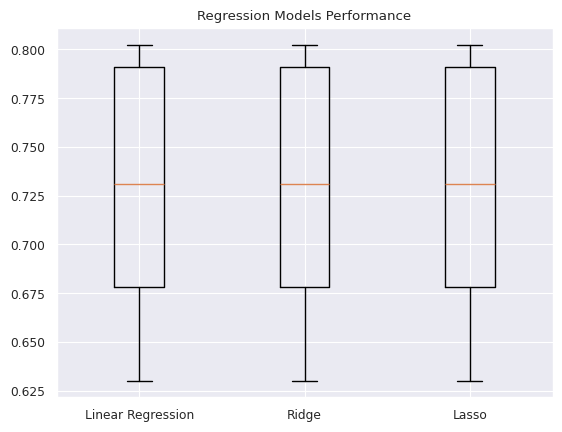

In [65]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.001), "Lasso": Lasso(alpha=0.001)}
results = []

for model in models.values():
    kf = KFold(n_splits= 6, shuffle= True, random_state= 20)
    cv_score = cross_val_score(model, X_train, y_train, cv= kf)
    results.append(cv_score)
    
plt.boxplot(results, tick_labels= models.keys())
plt.title("Regression Models Performance")
plt.show()

In [66]:
# Evaluating models on Test Set
#RMSE
for name, model in models.items():
  
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Calculate the test_rmse
  test_rmse = root_mean_squared_error(y_test, y_pred)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 5876.293905153604
Ridge Test Set RMSE: 5876.293546066071
Lasso Test Set RMSE: 5876.293836118818


In [67]:
# R-squared  
for name, model in models.items():
  
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Calculate the test_r_sq
  test_rmse = r2_score(y_test, y_pred)
  print("{} Test Set r2_score: {}".format(name, test_rmse))

Linear Regression Test Set r2_score: 0.7775773771035601
Ridge Test Set r2_score: 0.7775774042870841
Lasso Test Set r2_score: 0.7775773823296084


> *Using Lasso model to extract Feature Importance*

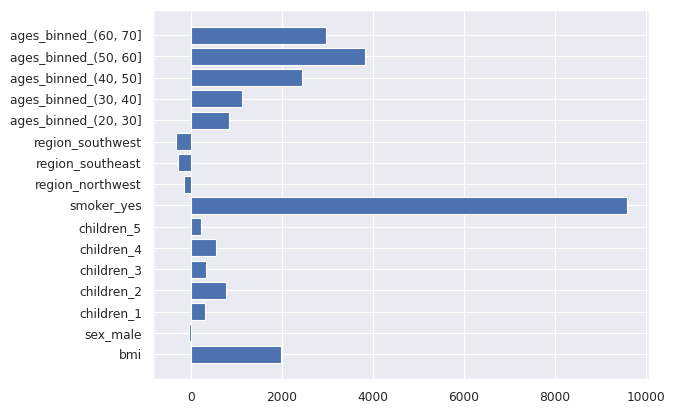

In [72]:
#Plotting feature importance
plt.barh(columns, model.coef_)
plt.show()

#### Conclusion:

All the three regression models are almost identical in performance.